In [24]:
%load_ext autoreload
%autoreload 2

import parse_data.prepare_data as prepare_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import globals
import data_strings
import trajectory_analysis.trajectory_vectors as trajectory_vectors
import data_extraction.get_indices as get_indices
import analysis.trajectory_efficiency as trajectory_efficiency
import analysis.player_scores as player_scores
from scipy.stats import pearsonr
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Calculate trajectory efficiency ratios for each player in a session, for all sessions, and separating wins from losses

In [6]:
data_folder = data_strings.DATA_FOLDER
json_filenames_all_social = data_strings.JSON_FILENAMES_SOCIAL

In [7]:
json_filenames = json_filenames_all_social

In [8]:
_, trial_lists = prepare_data.prepare_data(data_folder, data_strings.JSON_FILENAMES_SOCIAL, combine=False)

filepath: C:\Users\tomha\OneDrive\PhD\SWC\data\first_experiments_2409\240913\2024-09-13_11-31-00_YansuJerrySocial.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Preprocessing complete.
filepath: C:\Users\tomha\OneDrive\PhD\SWC\data\second_experiments_2409\240927\2024-09-27_14-25-20_SaraEmilySocial.json
Loading complete.
Preprocessing complete.
filepath: C:\Users\tomha\OneDrive\PhD\SWC\data\third_experiments_2410\241017\2024-10-17_14-28-40_ShamirAbigailSocial.json
Loading complete.
Preprocessing complete.
filepath: C:\Users\tomha\OneDrive\PhD\SWC\data\fourth_experiments_2410\241017\2024-10-17_16-41-38_ZimoElsaSocial.json
Loading complete.
Preprocessing complete.
filepath: C:\Users\tomha\OneDrive\PhD\SWC\data\fifth_experiments_241112\2024-11-12_13-31-14_KhadijaWendySocial.json
Loading complete.
Preprocessing complete.
filepath: C:\Users\tomha\OneDrive\PhD\SWC\data\sixth_experiments_241112\2024-11-12_15

In [9]:
(ratio_player_0_win, ratio_player_0_loss, ratio_player_1_win, ratio_player_1_loss) = trajectory_efficiency.ratio_direct_to_absolute_distances_session(trial_lists[0])

In [10]:
ratio_player_0_win, ratio_player_0_loss, ratio_player_1_win, ratio_player_1_loss

(np.float64(0.8180543609037378),
 np.float64(0.7526065258454677),
 np.float64(0.7695818626503675),
 np.float64(0.6271476309674597))

In [11]:
trajectory_efficiency_ratios = trajectory_efficiency.ratio_direct_to_absolute_distances_multiple_sessions(trial_lists)

c:\users\tomha\repos\octagon_analysis\analysis\trajectory_efficiency.py:145: RuntimeWarning: invalid value encountered in divide
  ratio_player_0_loss =  np.nanmean(player_0_loss_direct_distances/player_0_loss_actual_distances)
c:\users\tomha\repos\octagon_analysis\analysis\trajectory_efficiency.py:144: RuntimeWarning: invalid value encountered in divide
  ratio_player_0_win =  np.nanmean(player_0_win_direct_distances/player_0_win_actual_distances)
c:\users\tomha\repos\octagon_analysis\analysis\trajectory_efficiency.py:147: RuntimeWarning: invalid value encountered in divide
  ratio_player_1_loss =  np.nanmean(player_1_loss_direct_distances/player_1_loss_actual_distances)
c:\users\tomha\repos\octagon_analysis\analysis\trajectory_efficiency.py:146: RuntimeWarning: invalid value encountered in divide
  ratio_player_1_win = np.nanmean(player_1_win_direct_distances/player_1_win_actual_distances)


In [12]:
trajectory_efficiency_ratios

array([[0.81805436, 0.75260653, 0.76958186, 0.62714763],
       [0.8528626 , 0.74524714, 0.97358384, 0.97010905],
       [0.80857126, 0.75096426, 0.96135905, 0.93467841],
       [0.91968453, 0.76394457, 0.97535918, 0.92923553],
       [0.73610489, 0.70538151, 0.8661736 , 0.86554128],
       [0.91374202, 0.84900348, 0.88118037, 0.84936182],
       [0.93627636, 0.92750364, 0.95772683, 0.94869054],
       [0.94167449, 0.94123678, 0.80581444, 0.70804739],
       [0.87646966, 0.82234305, 0.85116921, 0.58362716],
       [0.88844501, 0.8352379 , 0.77381439, 0.76717592],
       [0.9787667 , 0.96694637, 0.78405313, 0.6277685 ],
       [0.89376756, 0.924481  , 0.98079487, 0.98913242],
       [0.92272215, 0.75701102, 0.85513815, 0.91666325],
       [0.93993359, 0.77837413, 0.78081523, 0.690008  ]])

In [13]:
loss_trajectory_efficiency_ratio = trajectory_efficiency_ratios[:,1]/trajectory_efficiency_ratios[:,3]
win_trajectory_efficiency_ratio = trajectory_efficiency_ratios[:,0]/trajectory_efficiency_ratios[:,2]

In [14]:
proportion_score_array = player_scores.proportion_score_sessions_df(trial_lists)

In [15]:
proportion_score_array

array([[0.42406312, 0.57593688],
       [0.37438424, 0.62561576],
       [0.42009132, 0.57990868],
       [0.33567416, 0.66432584],
       [0.37628866, 0.62371134],
       [0.79399142, 0.20600858],
       [0.492569  , 0.507431  ],
       [0.38533835, 0.61466165],
       [0.32718894, 0.67281106],
       [0.78571429, 0.21428571],
       [0.24919094, 0.75080906],
       [0.29604131, 0.70395869],
       [0.73058252, 0.26941748],
       [0.57790927, 0.42209073]])

Pearson's Correlation: 0.2748326687528661
P-value (Pearson): 0.34163340778476553


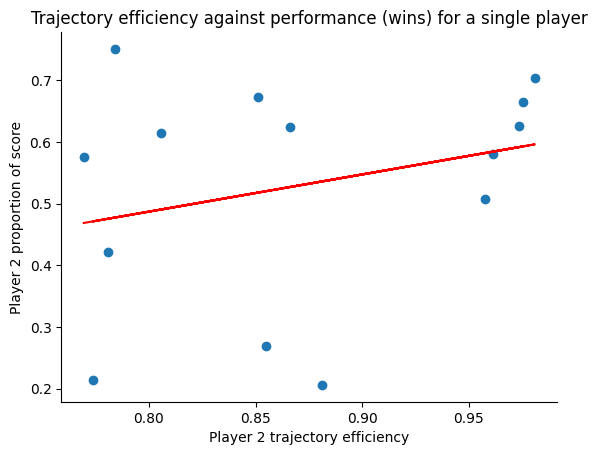

In [41]:
x = trajectory_efficiency_ratios[:,2]
y = proportion_score_array[:,1]
plt.scatter(x, y)


plt.title("Trajectory efficiency against performance (wins) for a single player")
plt.xlabel("Player 2 trajectory efficiency")
plt.ylabel("Player 2 proportion of score")

# Remove top and bottom spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# correlation line
slope, intercept = np.polyfit(x,y, deg=1)
line = slope * x + intercept
plt.gca().plot(x, line, color='r')

# correlation coefficients
corr_coeff_pearsonr, p_val_pearsonr = pearsonr(x,y)
print("Pearson's Correlation:", corr_coeff_pearsonr)
print("P-value (Pearson):", p_val_pearsonr)


Pearson's Correlation: -0.09703740629837539
P-value (Pearson): 0.7413929282831923


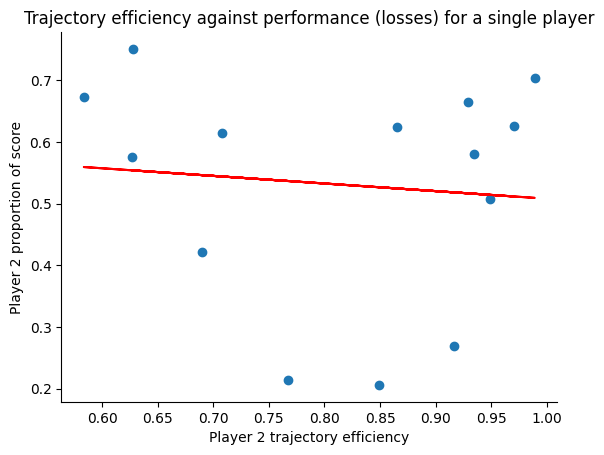

In [44]:
x = trajectory_efficiency_ratios[:,3]
y = proportion_score_array[:,1]
plt.scatter(x, y)

plt.title("Trajectory efficiency against performance (losses) for a single player")
plt.xlabel("Player 2 trajectory efficiency")
plt.ylabel("Player 2 proportion of score")

# Remove top and bottom spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# correlation line
slope, intercept = np.polyfit(x,y, deg=1)
line = slope * x + intercept
plt.gca().plot(x, line, color='r')

# correlation coefficients
corr_coeff_pearsonr, p_val_pearsonr = pearsonr(x,y)
print("Pearson's Correlation:", corr_coeff_pearsonr)
print("P-value (Pearson):", p_val_pearsonr)


In [51]:
x = np.concat((trajectory_efficiency_ratios[:,3], trajectory_efficiency_ratios[:,1]), axis=0)
y = np.concat((trajectory_efficiency_ratios[:,2], trajectory_efficiency_ratios[:,0]), axis=0)

In [52]:
x

array([0.62714763, 0.97010905, 0.93467841, 0.92923553, 0.86554128,
       0.84936182, 0.94869054, 0.70804739, 0.58362716, 0.76717592,
       0.6277685 , 0.98913242, 0.91666325, 0.690008  , 0.75260653,
       0.74524714, 0.75096426, 0.76394457, 0.70538151, 0.84900348,
       0.92750364, 0.94123678, 0.82234305, 0.8352379 , 0.96694637,
       0.924481  , 0.75701102, 0.77837413])

Pearson's Correlation: 0.7899701002485037
P-value (Pearson): 5.759678968103552e-07


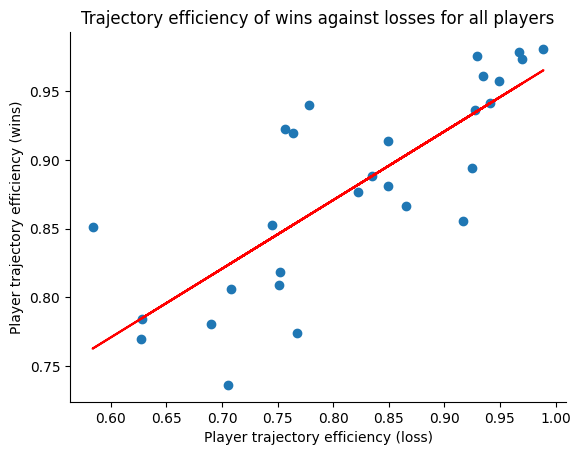

In [53]:
x = np.concat((trajectory_efficiency_ratios[:,3], trajectory_efficiency_ratios[:,1]), axis=0)
y = np.concat((trajectory_efficiency_ratios[:,2], trajectory_efficiency_ratios[:,0]), axis=0)
plt.scatter(x, y)


plt.title("Trajectory efficiency of wins against losses for all players")
plt.xlabel("Player trajectory efficiency (loss)")
plt.ylabel("Player trajectory efficiency (wins)")

# Remove top and bottom spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# correlation line
slope, intercept = np.polyfit(x,y, deg=1)
line = slope * x + intercept
plt.gca().plot(x, line, color='r')

# correlation coefficients
corr_coeff_pearsonr, p_val_pearsonr = pearsonr(x,y)
print("Pearson's Correlation:", corr_coeff_pearsonr)
print("P-value (Pearson):", p_val_pearsonr)


Pearson's Correlation: 0.2592326440366774
P-value (Pearson): 0.37080515454664065


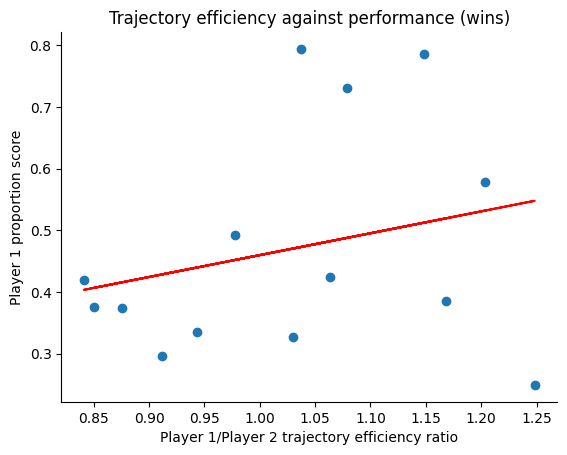

In [ ]:
x = win_trajectory_efficiency_ratio
y = proportion_score_array[:,0]
plt.scatter(x, y)


plt.title("Trajectory efficiency against performance (wins)")
plt.xlabel("Player 1/Player 2 trajectory efficiency ratio")
plt.ylabel("Player 1 proportion score")

# Remove top and bottom spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# correlation line
slope, intercept = np.polyfit(x,y, deg=1)
line = slope * x + intercept
plt.gca().plot(x, line, color='r')

# correlation coefficients
corr_coeff_pearsonr, p_val_pearsonr = pearsonr(x,y)
print("Pearson's Correlation:", corr_coeff_pearsonr)
print("P-value (Pearson):", p_val_pearsonr)


Pearson's Correlation: -0.22840342569996686
P-value (Pearson): 0.43222111026654164


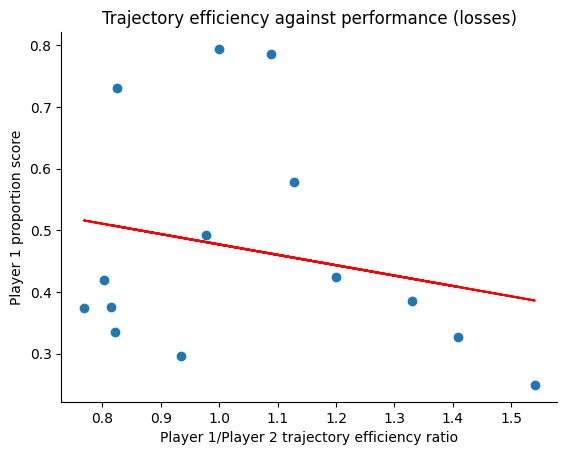

In [25]:
x = loss_trajectory_efficiency_ratio
y = proportion_score_array[:,0]

plt.scatter(x,y)
plt.title("Trajectory efficiency against performance (losses)")
plt.xlabel("Player 1/Player 2 trajectory efficiency ratio")
plt.ylabel("Player 1 proportion score")

# Remove top and bottom spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


# Fit a line to the data
slope, intercept = np.polyfit(x, y, 1)  # 1st-degree polynomial (linear fit)
line = slope * x + intercept

# Plot the correlation line
plt.plot(x, line, color='red', label=f'Fit line: y = {slope:.2f}x + {intercept:.2f}')

# find the correlation
corr_coeff_pearsonr, p_val_pearsonr = pearsonr(x,y)
print("Pearson's Correlation:", corr_coeff_pearsonr)
print("P-value (Pearson):", p_val_pearsonr)


- Positive (non-significant) correlation for ratio of trajectory efficiency against proportion of score within session for WINS
  - This seems simple: if your trajectories are more efficienct than your opponents when you win, you might be expected to be making more wins

- Negative (non-significant) correlation for ratio of trajectory efficiency against proportion of score within session for LOSSES
  - More complex relationship? If your losses show better trajectory efficiency than the opponents losses, may be a situation where the opponents has even higher trajectory efficiency (hence the loss), and that they opponent is mainly losing when they can't see walls and moves around to find them, not because their control of the game is poor
